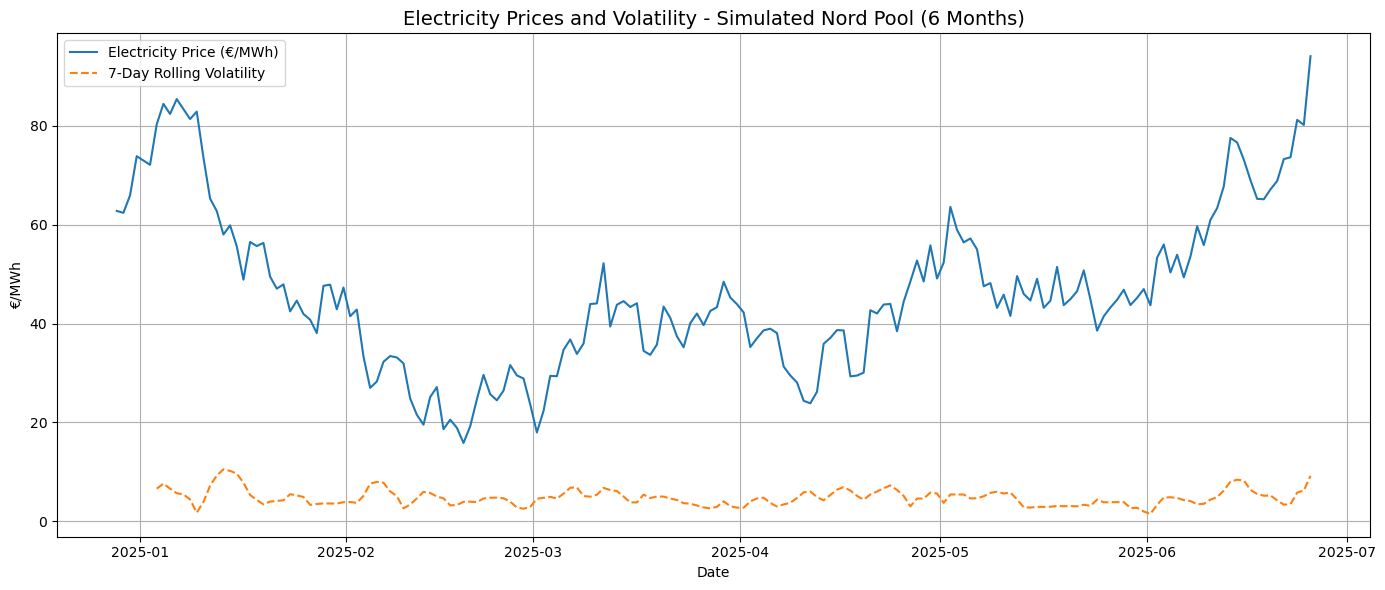

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data: 6 months of daily prices for electricity (€/MWh)
np.random.seed(42)
dates = pd.date_range(end=pd.Timestamp.today(), periods=180)
prices = 60 + np.random.normal(loc=0.3, scale=5, size=180).cumsum()

# Create DataFrame
electricity_data = pd.DataFrame({'Date': dates, 'Price_EUR_per_MWh': prices})
electricity_data.set_index('Date', inplace=True)

# Calculate 7-day rolling volatility
electricity_data['Volatility'] = electricity_data['Price_EUR_per_MWh'].rolling(window=7).std()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(electricity_data.index, electricity_data['Price_EUR_per_MWh'], label='Electricity Price (€/MWh)')
plt.plot(electricity_data.index, electricity_data['Volatility'], label='7-Day Rolling Volatility', linestyle='--')
plt.title('Electricity Prices and Volatility - Simulated Nord Pool (6 Months)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('€/MWh')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


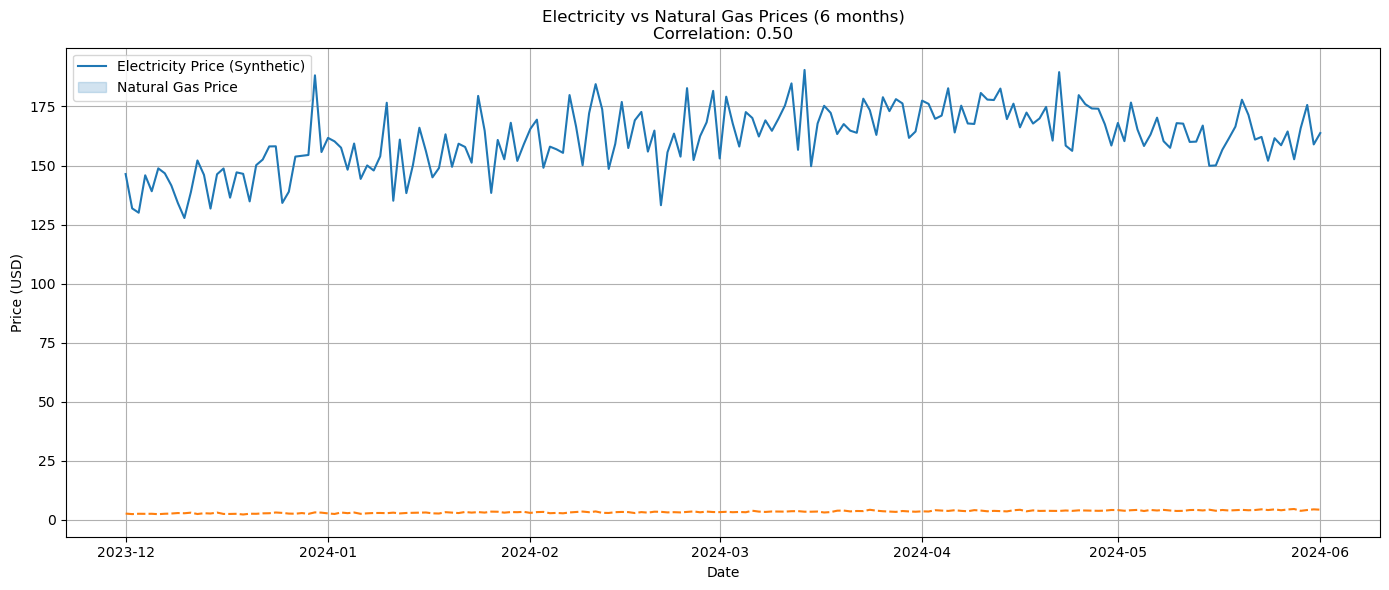

0.49858166327657116

In [2]:
# Fixing missing module and regenerating full output using only pandas and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic electricity price data
elec_dates = pd.date_range(start="2023-12-01", end="2024-06-01", freq='D')
elec_prices = pd.Series(150 + 20 * np.sin(2 * np.pi * elec_dates.dayofyear / 365) + 
                        np.random.normal(0, 10, len(elec_dates)), index=elec_dates)

# Simulate gas prices with a general upward trend and volatility
gas_prices = pd.Series(2.5 + 0.01 * np.arange(len(elec_dates)) + 
                       np.random.normal(0, 0.2, len(elec_dates)), index=elec_dates)

# Create DataFrame
df = pd.DataFrame({
    "Electricity_Price": elec_prices,
    "Gas_Price": gas_prices
})

# Drop any potential NaN values
df.dropna(inplace=True)

# Calculate correlation
correlation = df["Electricity_Price"].corr(df["Gas_Price"])

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df)
plt.title(f"Electricity vs Natural Gas Prices (6 months)\nCorrelation: {correlation:.2f}")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend(['Electricity Price (Synthetic)', 'Natural Gas Price'])
plt.tight_layout()
plt.show()

correlation


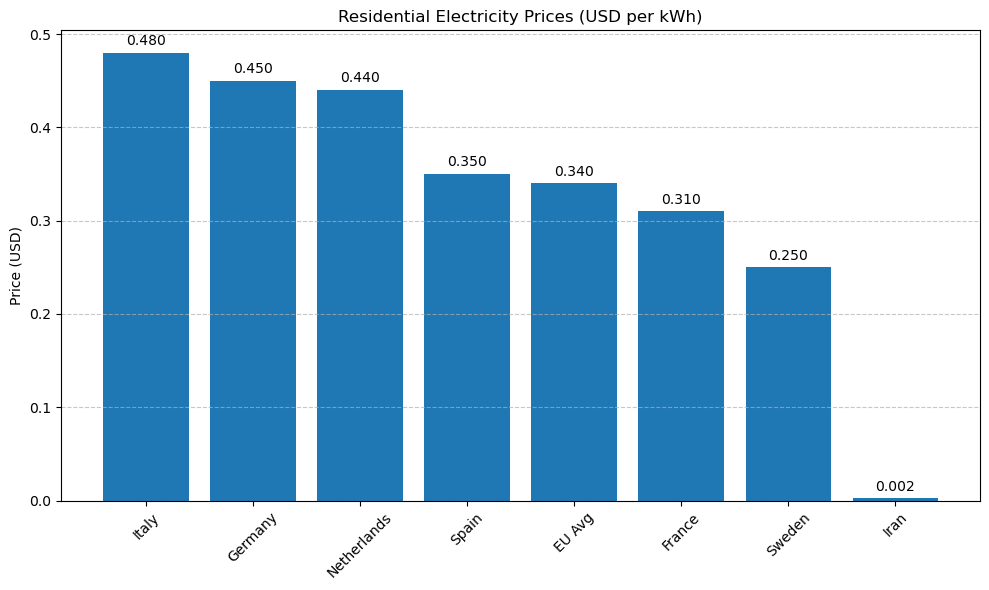

In [3]:
import matplotlib.pyplot as plt

# Re-defining data after code execution state reset
prices = {
    'Iran': 0.0024,
    'Germany': 0.45,
    'France': 0.31,
    'Italy': 0.48,
    'Spain': 0.35,
    'Netherlands': 0.44,
    'Sweden': 0.25,
    'EU Avg': 0.34
}

# Sort prices for better visualization
sorted_prices = dict(sorted(prices.items(), key=lambda item: item[1], reverse=True))

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_prices.keys(), sorted_prices.values())
plt.title('Residential Electricity Prices (USD per kWh)')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, f'{yval:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
